# **Final Project**

## **Imports and Helper Functions**

In [10]:
import warnings
warnings.filterwarnings('ignore')
import importlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [14]:
def plot_images(generator, num_images=9):
    """
    Plots a grid of input, output, and combined images using the provided generator.
    :param generator: An instance of ImageDataGenerator that yields paired input and output images.
    :param num_images: Total number of images to display in a grid (should be a perfect square).
    """
    plt.figure(figsize=(15, 10))  # Adjust the figure size to accommodate the additional images.
    for i in range(num_images):
        batch_window = len(generator)/num_images
        inputs, outputs = generator.__getitem__(np.random.randint(i*batch_window, (i+1)*batch_window))  # Get a random batch.
        for j in range(min(len(inputs), num_images - i)):
            # Plot grayscale input image.
            ax = plt.subplot(num_images//3, 9, 3*i + 1 + 3*j)
            plt.imshow(inputs[j].astype('uint8'), cmap='gray')
            plt.title("IN (L)")
            plt.axis('off')

            # Convert LAB AB channels back to RGB for visualization.
            lab_image = np.zeros((360, 480, 3), dtype=np.uint8)
            lab_image[:, :, 0] = 100  # Set a fixed L channel.
            lab_image[:, :, 1:] = outputs[j]
            rgb_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2RGB)
            # Plot AB output image.
            ax = plt.subplot(num_images//3, 9, 3*i + 2 + 3*j)
            plt.imshow(rgb_image)
            plt.title("OUT (AB)")
            plt.axis('off')

            # Create combined image using grayscale as L channel and AB from output
            combined_lab_image = np.zeros((360, 480, 3), dtype=np.uint8)
            combined_lab_image[:, :, 0] = (cv2.cvtColor(inputs[j], cv2.COLOR_RGB2GRAY))  # Use the grayscale image as the L channel
            combined_lab_image[:, :, 1:] = outputs[j]
            combined_rgb_image = cv2.cvtColor(combined_lab_image, cv2.COLOR_LAB2RGB)
            # Plot combined image
            ax = plt.subplot(num_images//3, 9, 3*i + 3 + 3*j)
            plt.imshow(combined_rgb_image)
            plt.title("Combined (L+AB)")
            plt.axis('off')
            
            if i + j >= num_images - 1:
                break

    plt.tight_layout()
    plt.show()





## **Preprocessing and Augmentation**

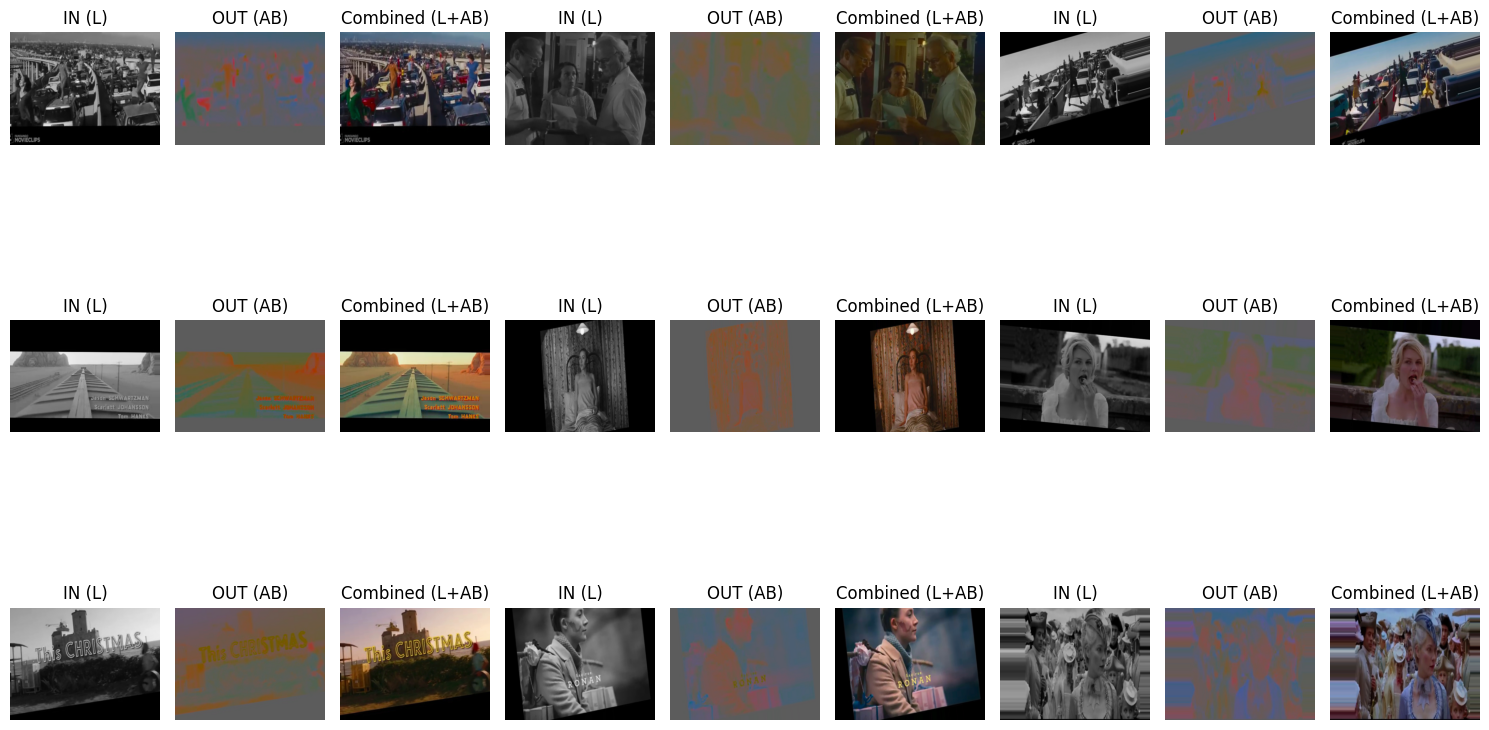

In [23]:
import src.Tyler_ImageDataGenerator as tyler_image_generator
importlib.reload(tyler_image_generator)
BATCH_SIZE = 8
RESOLUTION = (480, 360)
# Create data generator
train_directory = 'data/vibrant_movie_frames/rgb'
train_generator = tyler_image_generator.ImageDataGenerator(train_directory, resolution=RESOLUTION)

# Print examples from generator
plot_images(train_generator)


## **Training**

In [8]:
'''Calls training functions'''
import src.training as training
importlib.reload(training)
import src.objects.architecture.conv_autoencoder as conv_autoencoder
importlib.reload(conv_autoencoder)


print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

stack = training.get_best_model(stack)

Num GPUs Available:  0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


NameError: name 'stack' is not defined

In [9]:
import matplotlib.pyplot as plt
from skimage.color import rgb2lab,lab2rgb
import numpy as np

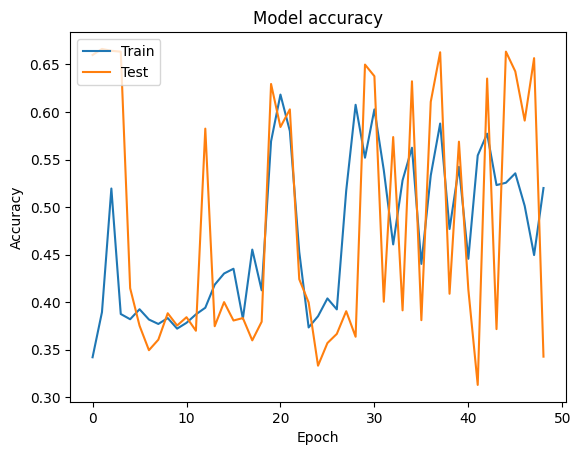

In [10]:
# Plot training & validation accuracy values
plt.plot(stack.final_history.history['accuracy'])
plt.plot(stack.final_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

15/15 [==============================] - 1s 91ms/step


ValueError: num must be an integer with 1 <= num <= 30, not 31

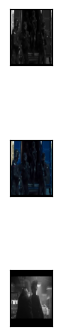

In [13]:


predictions = stack.final_model.predict(stack.bw_test_list)
predictions.shape

n = 10
plt.figure(figsize=(35, 25))
for i in range(n):
    show = 20+i*20
    # Display original gray images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(stack.bw_test_list[show], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display original color images
    ax = plt.subplot(3, n, i + 1 + n)
    
    plt.imshow(stack.test_list[show])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display pred images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    
    plt.imshow(predictions[show])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.savefig('result.png')

## **Prediction**

In [12]:
'''Calls prediction fucntions in prediction.py and methods from result'''
predictor = Predictor(model_path='path/to/saved/model')
input_data = 'path/to/input/data'
predictions = predictor.predict(input_data)

NameError: name 'Predictor' is not defined

## **Validation**

In [ ]:
'''Calls the validation fuctions in validation.py and methods from result'''
validator = Validator(model_path='path/to/saved/model')
validation_data = 'path/to/validation/data'
evaluation_metrics = validator.validate(validation_data)